<a href="https://colab.research.google.com/github/Jwalitsolanki/Oil-and-Gas_ML/blob/master/Lithofacies_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.pipeline import Pipeline

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [3]:
df['Well Name'].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [4]:
feature_names = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']
facies_names = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']


X = df[feature_names].values 
y = df['Facies'].values

well = df['Well Name'].values
depth = df['Depth'].values

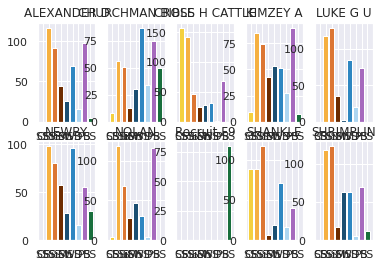

In [5]:
for w_idx, w in enumerate(np.unique(well)):
    well_idx = df['Well Name'].values == w
    
    ax = plt.subplot(2, 5, w_idx+1)
    hist = np.histogram(y[well_idx], bins=np.arange(len(facies_names)+1)+.5)
    plt.bar(np.arange(len(hist[0])), hist[0], color=facies_colors, align='center')
    ax.set_xticks(np.arange(len(hist[0])))
    ax.set_xticklabels(facies_names)
    ax.set_title(w)

In [6]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution")

    fig.tight_layout()  
    plt.show()

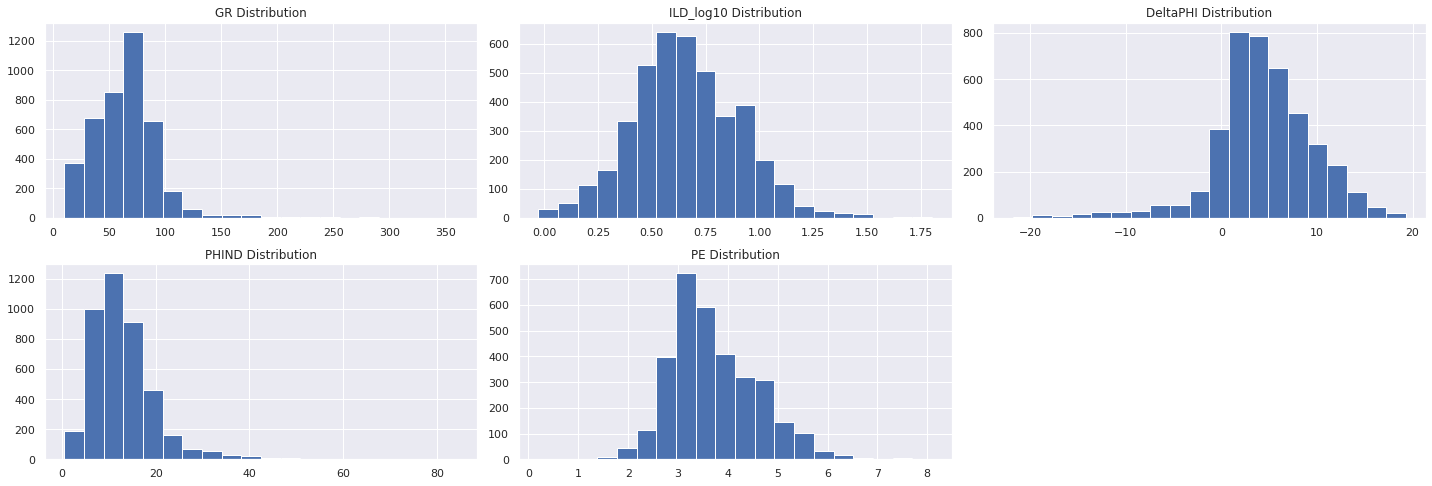

In [7]:
histograms_plot(df, feature_names, 6, 3)

In [8]:
def histograms_log_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        try:
            np.log(dataframe[feature]).hist(bins=50,ax=ax)
        except:
            pass
        ax.set_title(feature+" Distribution")

    fig.tight_layout()  
    plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


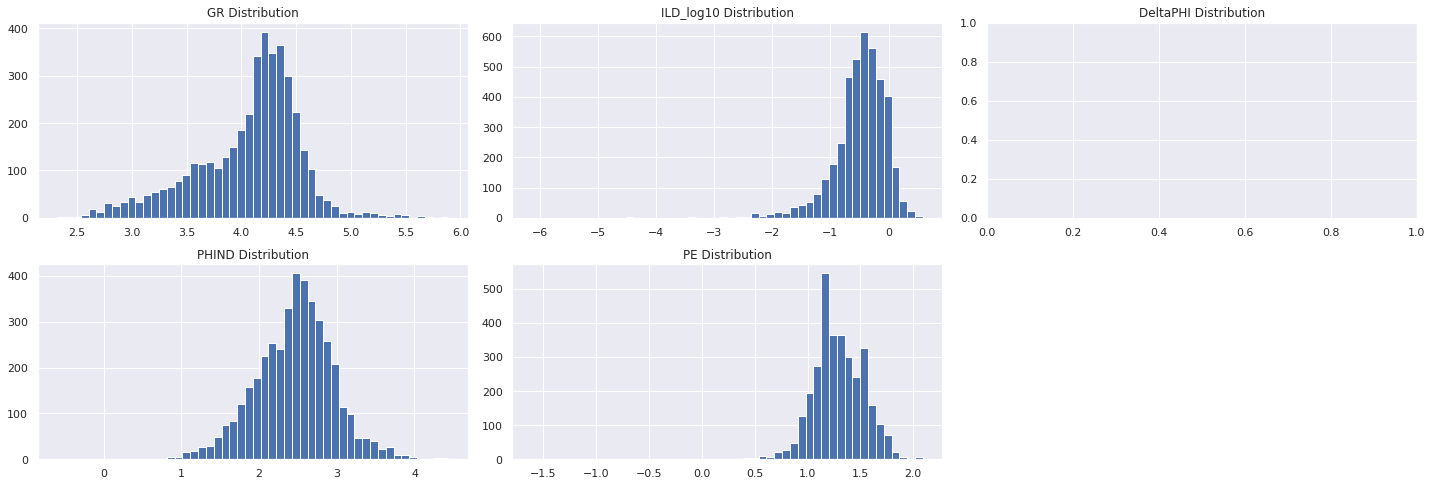

In [9]:
histograms_log_plot(df, feature_names, 6, 3)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Facies,4149.0,4.503254,2.474324,1.000000,2.000,4.0000,6.000,9.000
Depth,4149.0,2906.867438,133.300164,2573.500000,2821.500,2932.5000,3007.000,3138.000
GR,4149.0,64.933985,30.302530,10.149000,44.730,64.9900,79.438,361.150
ILD_log10,4149.0,0.659566,0.252703,-0.025949,0.498,0.6390,0.822,1.800
DeltaPHI,4149.0,4.402484,5.274947,-21.832000,1.600,4.3000,7.500,19.312
PHIND,4149.0,13.201066,7.132846,0.550000,8.500,12.0200,16.050,84.400
PE,3232.0,3.725014,0.896152,0.200000,3.100,3.5515,4.300,8.094
NM_M,4149.0,1.518438,0.499720,1.000000,1.000,2.0000,2.000,2.000
RELPOS,4149.0,0.521852,0.286644,0.000000,0.277,0.5280,0.769,1.000


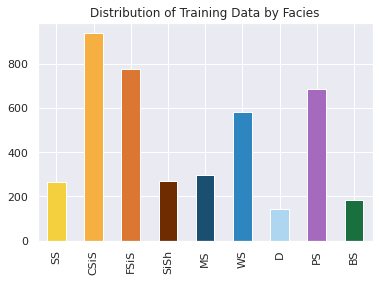

In [11]:
facies_counts = df['Facies'].value_counts().sort_index()
facies_counts.index = facies_names
facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')

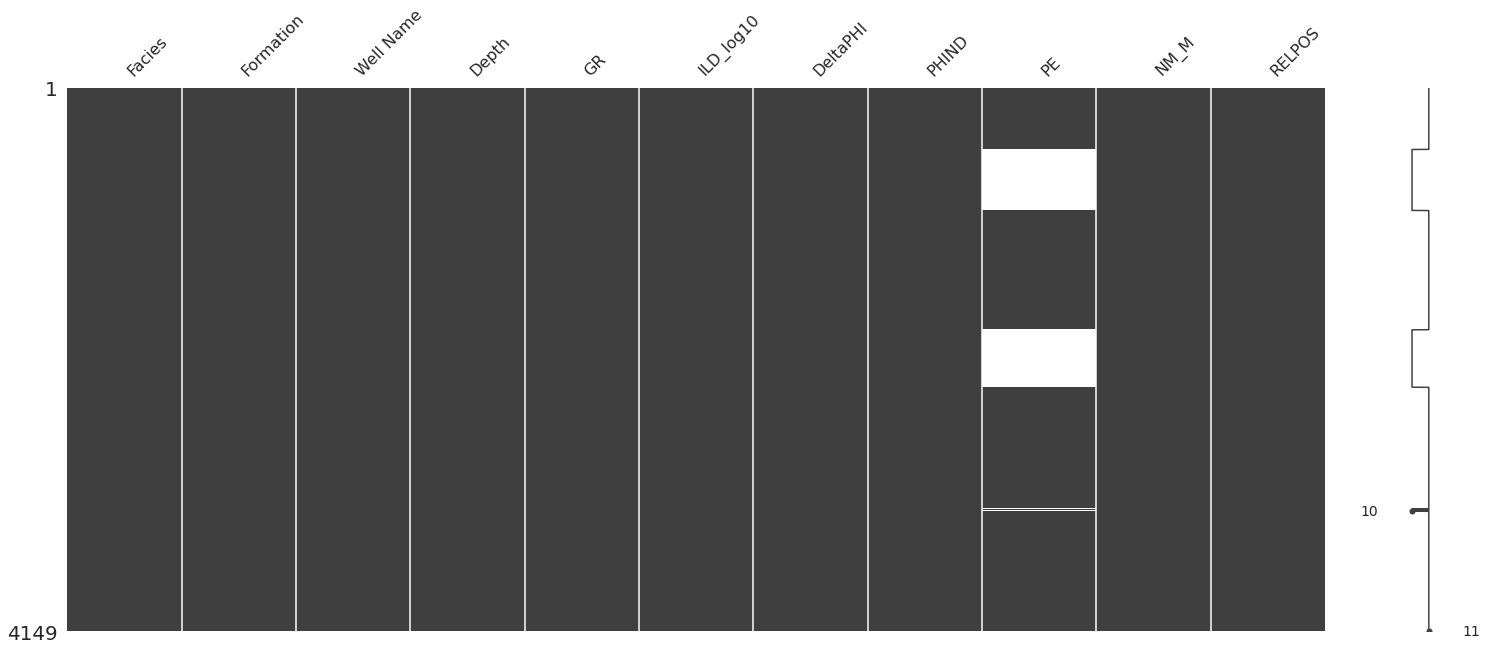

In [12]:
import missingno
missingno.matrix(df)

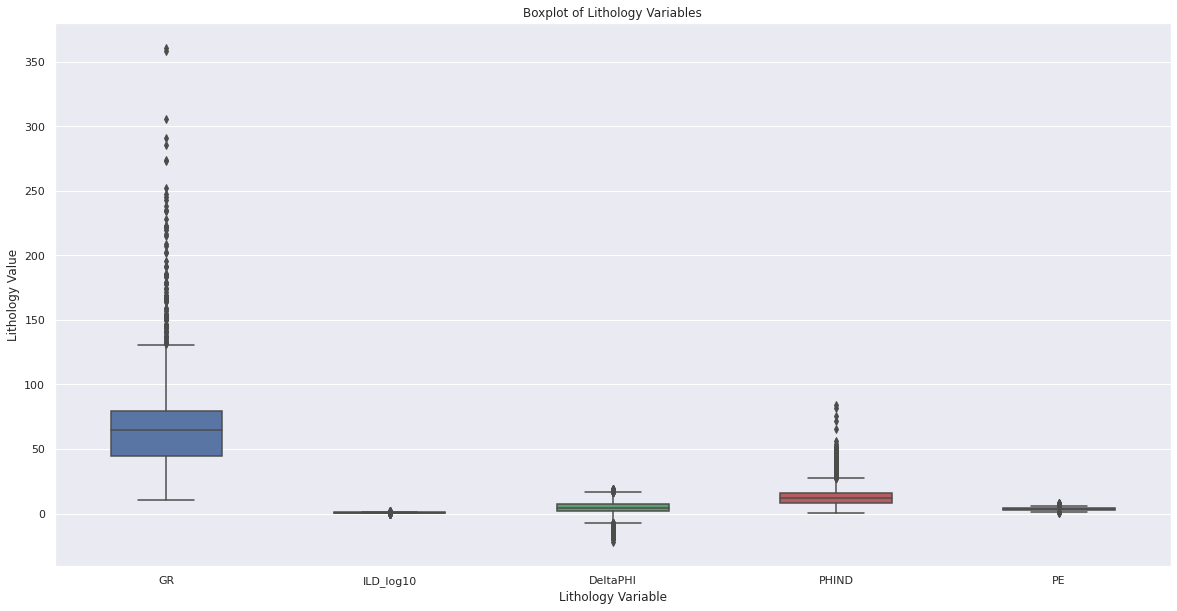

In [13]:
df_sec_boxplot = pd.melt(df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']])

plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df_sec_boxplot["variable"], y=df_sec_boxplot["value"], showfliers = True, width=0.5)
ax.set(xlabel='Lithology Variable', ylabel='Lithology Value')
ax.set_title("Boxplot of Lithology Variables")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


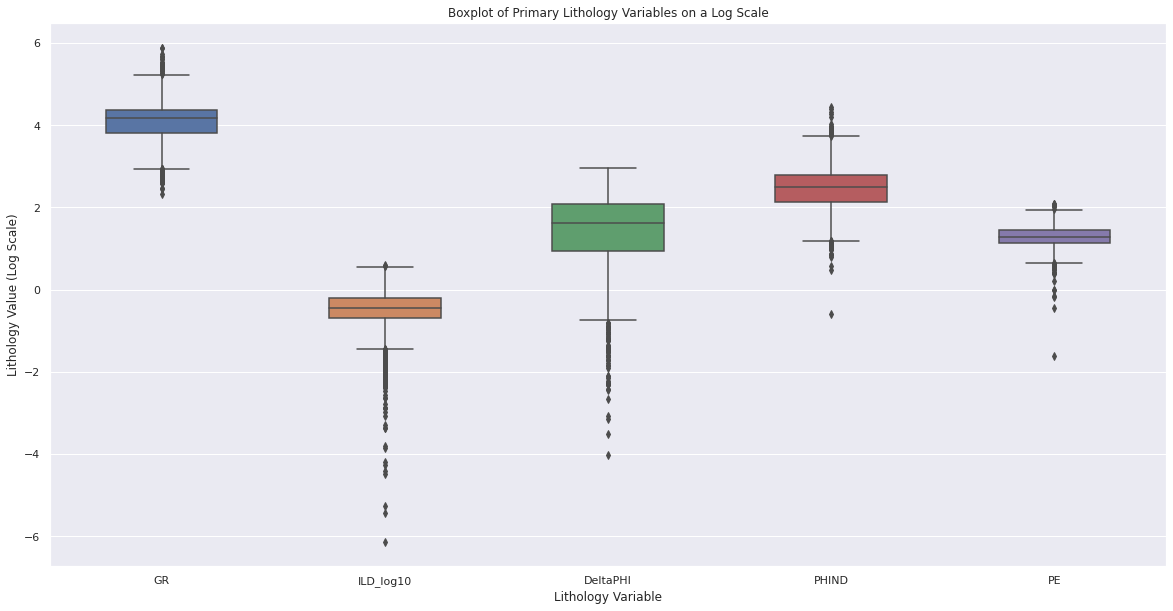

In [14]:
df_sec_log_boxplot = pd.melt(np.log(df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']]))

plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df_sec_log_boxplot["variable"], y=df_sec_log_boxplot["value"], showfliers = True, width=0.5)
ax.set(xlabel='Lithology Variable', ylabel='Lithology Value (Log Scale)')
ax.set_title("Boxplot of Primary Lithology Variables on a Log Scale")
plt.show()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Facies,4149.0,4.503254,2.474324,1.000000,2.000,4.0000,6.000,9.000
Depth,4149.0,2906.867438,133.300164,2573.500000,2821.500,2932.5000,3007.000,3138.000
GR,4149.0,64.933985,30.302530,10.149000,44.730,64.9900,79.438,361.150
ILD_log10,4149.0,0.659566,0.252703,-0.025949,0.498,0.6390,0.822,1.800
DeltaPHI,4149.0,4.402484,5.274947,-21.832000,1.600,4.3000,7.500,19.312
PHIND,4149.0,13.201066,7.132846,0.550000,8.500,12.0200,16.050,84.400
PE,3232.0,3.725014,0.896152,0.200000,3.100,3.5515,4.300,8.094
NM_M,4149.0,1.518438,0.499720,1.000000,1.000,2.0000,2.000,2.000
RELPOS,4149.0,0.521852,0.286644,0.000000,0.277,0.5280,0.769,1.000


In [16]:
#Just a copy, incase it gets ugly!
df_1 = df.copy()

In [17]:
import pylab
from mpl_toolkits import mplot3d
from matplotlib.ticker import ScalarFormatter

In [18]:
blind = df_1[df_1['Well Name'] == 'SHANKLE']
training_data = df_1[df_1['Well Name'] != 'SHANKLE']
print(training_data.shape)

(3700, 11)


In [19]:
def plotalllogs(dataframe):
#=============================================================================    
    tracks=5
    linewidth=0.4
    ## Gamma Ray
    trackGR=0 #Gamma Ray
    ## Gamma Ray
    trackRES=1 #Gamma Ray
    ## Resistivity
    trackPOR=2
    ## Porosity
    trackPHIND = 3
    ## PEF
    trackPE = 4 
#=============================================================================    
    pylab.rcParams.update({'font.size': 13, 'font.family': 'serif', 'figure.figsize': (10,20)})
    fig,axes = plt.subplots(1,tracks,sharey=True,figsize=(15,15), dpi=100) ##sharey: share y axis
    fig.gca().invert_yaxis()
#=============================================================================
#================================================
    ## GR
    ax1 = axes[trackGR]
    ax1.grid(which='both')
    ax1.plot(dataframe['GR'],dataframe.index, label='GR', color='green', lw=linewidth)
    ax1.set_xlabel('GR, GAPI')
    ax1.set_xlim(0,350)
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')

    ## Resistivity
    ax2 = axes[trackRES]
    ax2.grid(which='both')
    ax2.plot(dataframe['ILD_log10'],dataframe.index, label='Resistivity', color='black', lw=linewidth)
    ax2.set_xlabel('Resistivity, log scale')
    ax2.set_xlim(0,2)
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')
# =============================================================================
    ## RHOB
    ax3 = axes[trackPOR].twiny()
    ax3.plot(dataframe['DeltaPHI'],dataframe.index, label='neutrondensity porosity difference', color='red', lw=linewidth)
    ax3.set_xlabel('POR')
    ax3.set_xlim(-22,20)
    #ax3.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])
    ax3.spines['top'].set_position(('outward', 40))
    #ax3.spines['top'].set_edgecolor('red')
    ax3.xaxis.set_ticks_position('top') # set the position of the second x-axis to top
    #ax3.tick_params(axis='x', colors='red')
    ax3.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax3.legend(bbox_to_anchor=(0.6, .9))
    ##NPHI
    ax4 = axes[trackPHIND]
    ax4.grid(which='both')
    ax4.plot(dataframe['PHIND'],dataframe.index, label='porosity', color='blue', lw=linewidth)
    ax4.set_xlim(0, 90)
    ax4.set_xlabel('porosity') 
    ax4.legend(bbox_to_anchor=(0.6, 1))
    ax4.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax4.xaxis.set_ticks_position('top')
    ax4.set_xticks([0, 30, 60, 90])
    ##PE
    ax5 = axes[trackPE]
    ax5.grid(which='both')
    ax5.plot(dataframe['PE'],dataframe.index, label='PE', lw=linewidth)
    ax5.set_xlabel('PE, barns/electron')
    ax5.set_xlim(0,10)
    ax5.xaxis.set_ticks_position('top')
    ax5.xaxis.set_label_position('top')

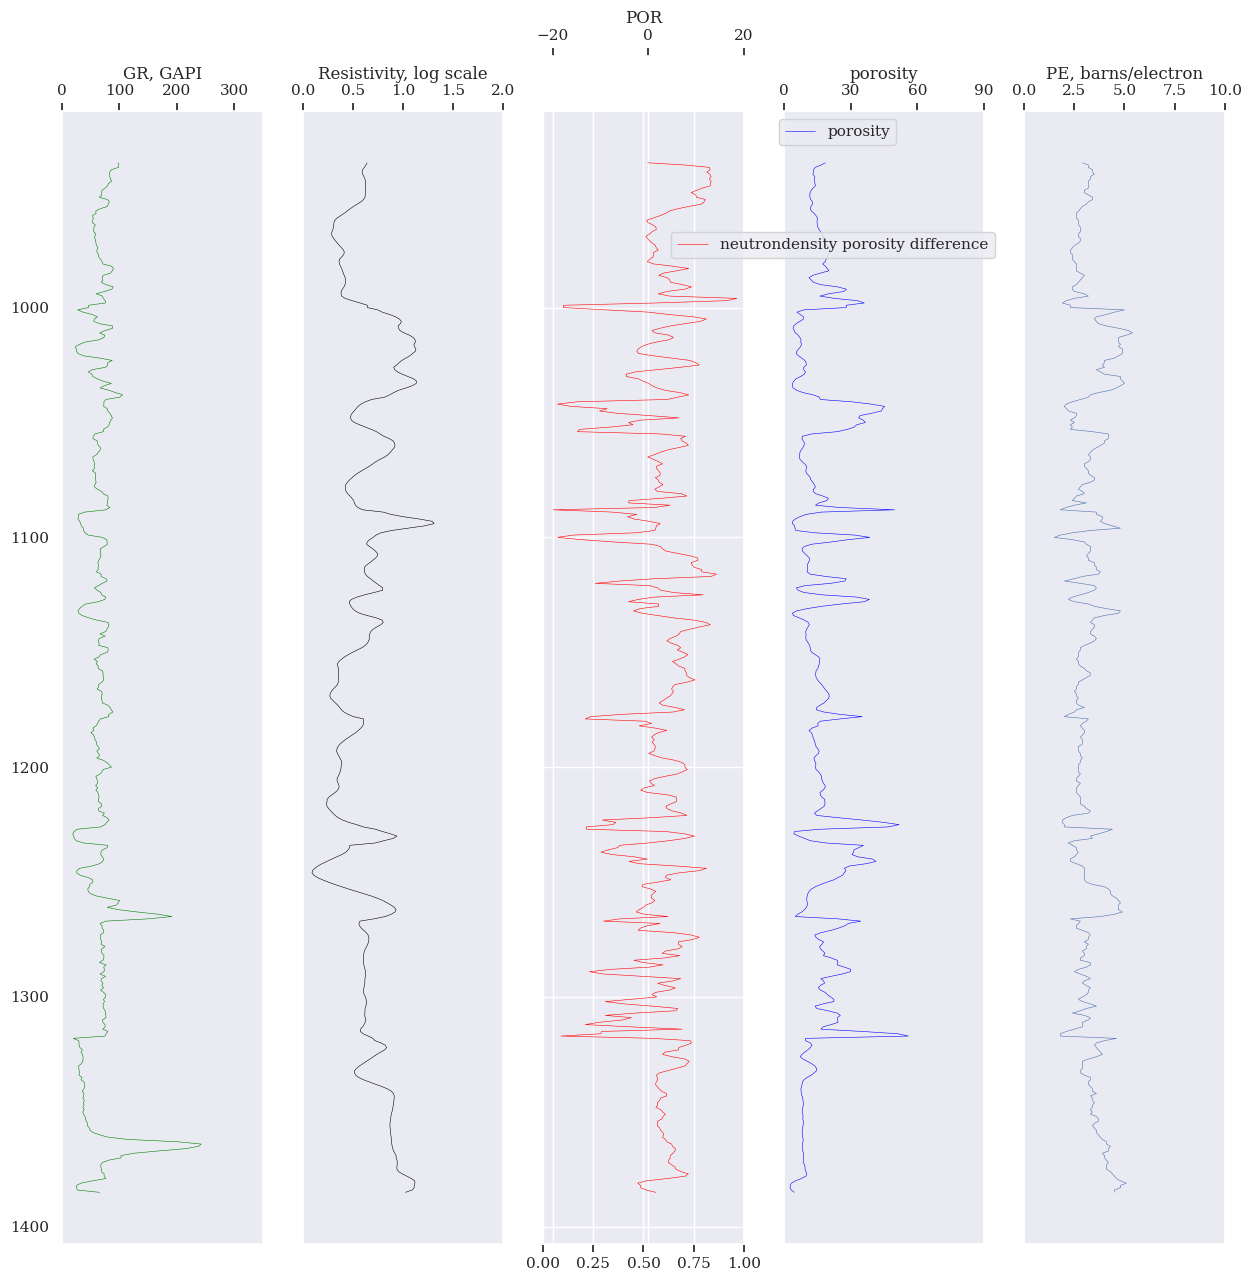

In [20]:
plotalllogs(blind)

In [21]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)                    

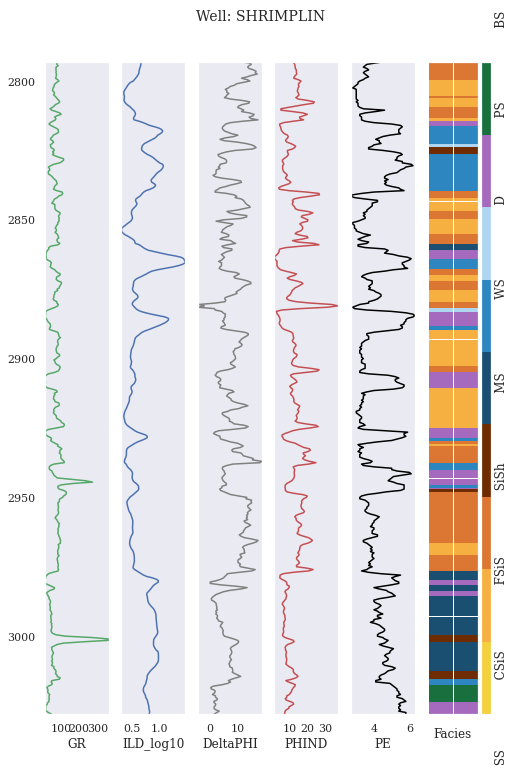

In [22]:
make_facies_log_plot(
    training_data[training_data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)

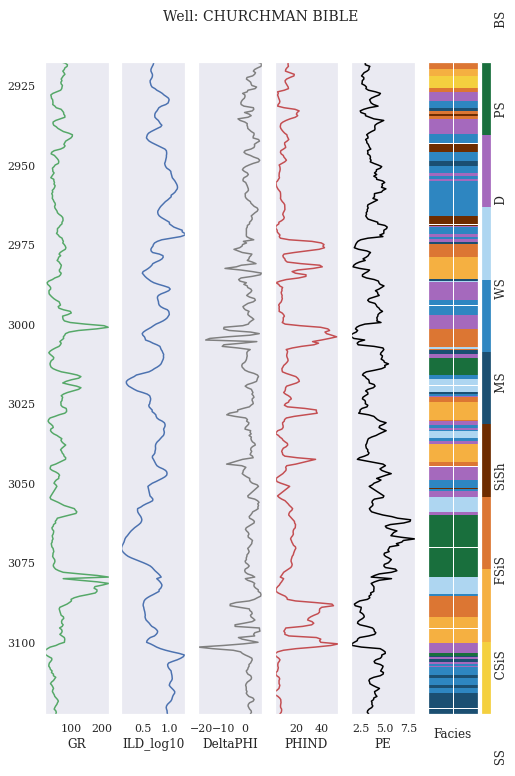

In [23]:
make_facies_log_plot(
    training_data[training_data['Well Name'] == 'CHURCHMAN BIBLE'],
    facies_colors)

In [24]:
facies_color_map = {}
for ind, label in enumerate(facies_names):
    facies_color_map[label] = facies_colors[ind]

In [25]:
def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_names), axis=1)
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Facies,3700.0,4.615676,2.475808,1.000000,2.00000,4.000000,7.0000,9.000
Depth,3700.0,2908.853378,139.010855,2573.500000,2818.50000,2939.000000,3015.1250,3138.000
GR,3700.0,64.873649,30.817166,10.149000,43.77825,64.817000,80.3225,361.150
ILD_log10,3700.0,0.663053,0.253863,-0.025949,0.50200,0.645613,0.8230,1.800
DeltaPHI,3700.0,4.651677,5.109006,-21.832000,1.80000,4.400000,7.6000,19.312
PHIND,3700.0,12.892826,6.796219,0.550000,8.35000,11.857500,15.7500,84.400
PE,2783.0,3.805693,0.894118,0.200000,3.20000,3.600000,4.4000,8.094
NM_M,3700.0,1.540000,0.498465,1.000000,1.00000,2.000000,2.0000,2.000
RELPOS,3700.0,0.524125,0.287147,0.000000,0.27800,0.531000,0.7720,1.000


/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


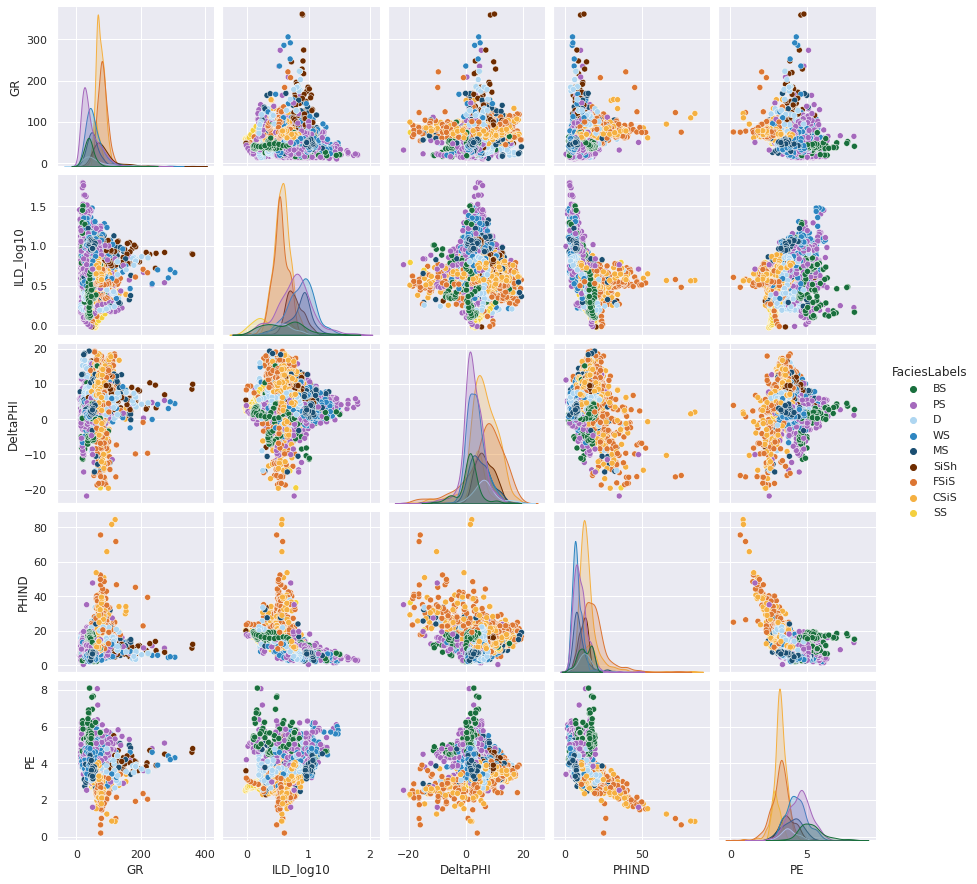

In [26]:
inline_rc = dict(mpl.rcParams)

import seaborn as sns
sns.set()
sns.pairplot(training_data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_names)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Facies,4149.0,4.503254,2.474324,1.000000,2.000,4.0000,6.000,9.000
Depth,4149.0,2906.867438,133.300164,2573.500000,2821.500,2932.5000,3007.000,3138.000
GR,4149.0,64.933985,30.302530,10.149000,44.730,64.9900,79.438,361.150
ILD_log10,4149.0,0.659566,0.252703,-0.025949,0.498,0.6390,0.822,1.800
DeltaPHI,4149.0,4.402484,5.274947,-21.832000,1.600,4.3000,7.500,19.312
PHIND,4149.0,13.201066,7.132846,0.550000,8.500,12.0200,16.050,84.400
PE,3232.0,3.725014,0.896152,0.200000,3.100,3.5515,4.300,8.094
NM_M,4149.0,1.518438,0.499720,1.000000,1.000,2.0000,2.000,2.000
RELPOS,4149.0,0.521852,0.286644,0.000000,0.277,0.5280,0.769,1.000


In [28]:
#This is step for outlier removal
#We know GR values should not exceed 200 and resistivity log values should start from 0
#This function removes outliers and brings exceeding values to 200


import operator

def outlier_removal(df, op, limit, replace):
    temp_name = df.name
    print('Before outlier removal for',df.name)
    print(df.name,'Min',min(df[df.notnull()]))
    print(df.name,'Max',max(df[df.notnull()]))
    outliers = [x for x in df if op(x,limit)]
    print('Number of',df.name,'outliers:',len(outliers),'\n')
    
    df = np.where((op(df,limit)), replace, df)
    df = pd.Series(df)
    print('After outlier removal for',temp_name)
    print(temp_name,'Min',min(df[df.notnull()]))
    print(temp_name,'Max',max(df[df.notnull()]))
    
    return df

In [29]:
df['GR'] = outlier_removal(df['GR'], operator.gt, 200, 200)

Before outlier removal for GR
GR Min 10.149
GR Max 361.15
Number of GR outliers: 27 

After outlier removal for GR
GR Min 10.149
GR Max 200.0


In [30]:
df['ILD_log10'] = outlier_removal(df['ILD_log10'], operator.le, 0, np.nan)

Before outlier removal for ILD_log10
ILD_log10 Min -0.025949097
ILD_log10 Max 1.8
Number of ILD_log10 outliers: 12 

After outlier removal for ILD_log10
ILD_log10 Min 0.0021660620000000003
ILD_log10 Max 1.8


In [31]:
print(df['ILD_log10'].isna().sum())
print(df.isna().sum())

12
Facies         0
Formation      0
Well Name      0
Depth          0
GR             0
            ... 
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
Length: 11, dtype: int64


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Facies,4149.0,4.503254,2.474324,1.000000,2.000,4.0000,6.000,9.000
Depth,4149.0,2906.867438,133.300164,2573.500000,2821.500,2932.5000,3007.000,3138.000
GR,4149.0,64.628135,28.456868,10.149000,44.730,64.9900,79.438,200.000
ILD_log10,4137.0,0.661525,0.250433,0.002166,0.499,0.6400,0.823,1.800
DeltaPHI,4149.0,4.402484,5.274947,-21.832000,1.600,4.3000,7.500,19.312
PHIND,4149.0,13.201066,7.132846,0.550000,8.500,12.0200,16.050,84.400
PE,3232.0,3.725014,0.896152,0.200000,3.100,3.5515,4.300,8.094
NM_M,4149.0,1.518438,0.499720,1.000000,1.000,2.0000,2.000,2.000
RELPOS,4149.0,0.521852,0.286644,0.000000,0.277,0.5280,0.769,1.000


In [33]:
X = df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']]
y = df['Facies']

In [34]:
X.fillna(0, inplace=True)

In [35]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [36]:
X.columns

Index(['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE'], dtype='object')

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print(X_test.shape)
print(X_train.shape)

(830, 5)
(3319, 5)


In [ ]:
k_values = {}
k=1

while k <= 25:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    performance = metrics.accuracy_score(y_test, predictions)
    k_values[k] = round(performance, 4)
    k += 1

In [ ]:
k_values

{1: 0.4819,
 2: 0.4349,
 3: 0.4639,
 4: 0.4566,
 5: 0.4747,
 6: 0.4916,
 7: 0.4892,
 8: 0.4892,
 9: 0.4892,
 10: 0.4783,
 11: 0.4843,
 12: 0.4759,
 13: 0.5,
 14: 0.4771,
 15: 0.4892,
 16: 0.4795,
 17: 0.4855,
 18: 0.4892,
 19: 0.4964,
 20: 0.4795,
 21: 0.4819,
 22: 0.4831,
 23: 0.4843,
 24: 0.4892,
 25: 0.494}

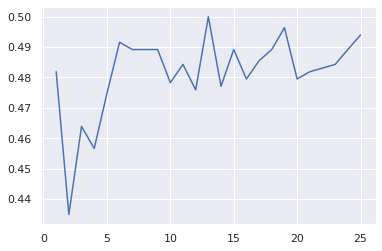

In [ ]:
plt.plot(list(k_values.keys()), list(k_values.values()))
plt.show()

In [ ]:
from sklearn import tree
clatree = tree.DecisionTreeClassifier(max_depth=4)
clatree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_train_pred = clatree.predict(X_train)
y_test_pred = clatree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_test_pred)

0.5108433734939759

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:
cla_xgb = xgb.XGBClassifier(max_depth=4, n_estimators=2000, learning_rate=0.3, n_jobs=-1)

In [ ]:
cla_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
accuracy_score(y_test, cla_xgb.predict(X_test))

0.5987951807228916

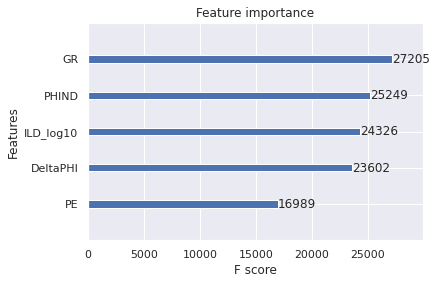

In [ ]:
xgb.plot_importance(cla_xgb)

In [ ]:
param_grid2 = {'max_depth': range(2,10,2),
               'gamma':[0.1,0.2,0.3],
               'subsample':[0.8,0.9],
               'colsample_bytree':[0.8,0.9],
               'reg_alpha':[1e-2,0.1,1]}

In [ ]:
grid_search2 = GridSearchCV(cla_xgb, param_grid2, cv=5, scoring='accuracy')

In [ ]:
grid_search2.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, grid_search2.predict(X_test))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [ ]:
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

In [ ]:
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                        ('pca1', PCA(n_components=3)),
                        ('lr_classifier', LogisticRegression(random_state=0))])

In [ ]:
pipeline_rf = Pipeline([('scalar1', StandardScaler()),
                        ('pca1', PCA(n_components=3)),
                        ('rf_classifier', RandomForestClassifier())])

In [ ]:
pipelines = [pipeline_lr, pipeline_rf]

In [ ]:
pipe_dict = {0:'logistic regression', 1:'random forest'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy : {}".format(pipe_dict[i], model.score(X_test, y_test)))